Задание 1
Найдите производные функций.

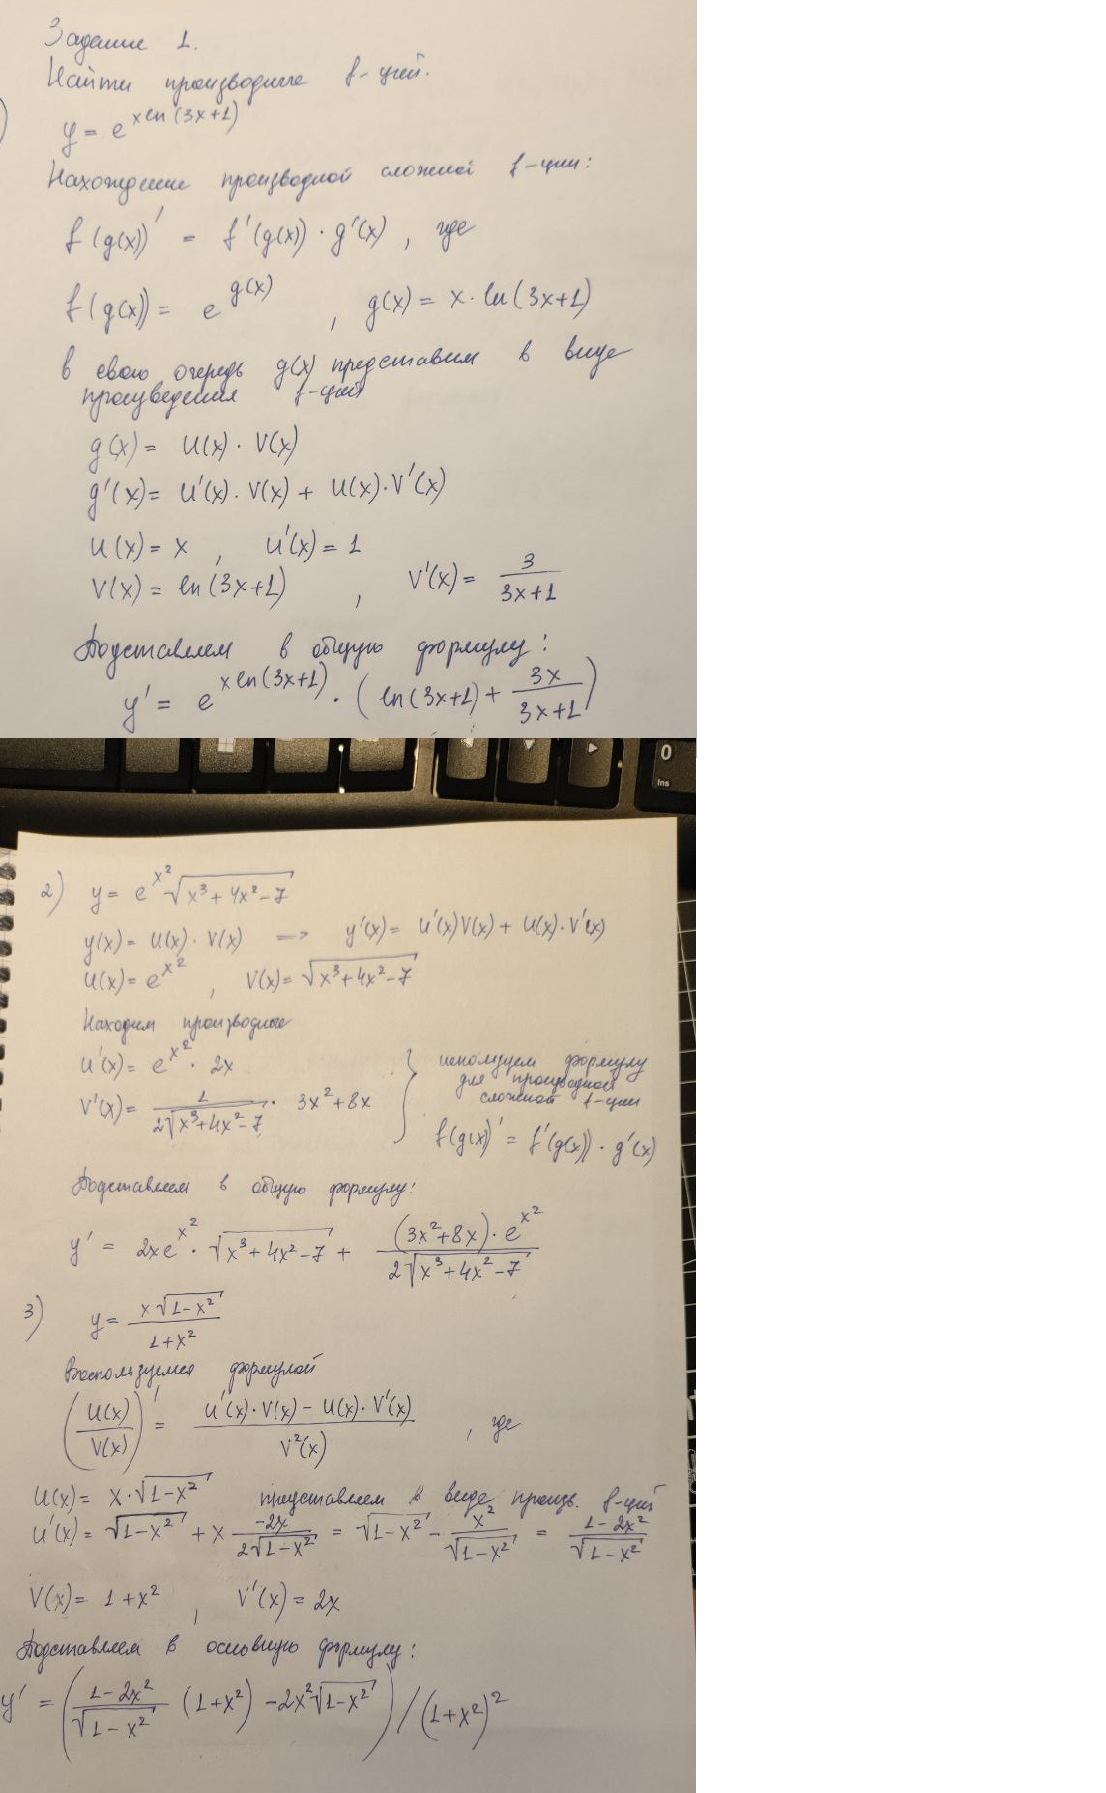

Задание 2

Найдите безусловные экстремумы функции:
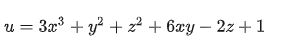

1. Находим частные производные функции по x,y,z

du/dx = 9x² + 6y

du/dy = 2y + 6x

du/dz = 2z - 2

2. Приравниваем частные производные к 0. Решаем систему уравнений

9x² + 6y = 0

2y + 6x = 0       : y = -3x

2z - 2 = 0       : z = 1

подставляем y в первое уравнение:
9x² + 6(-3x) = 0: -> 9x² -18x = 0: -> 9x (x-2) = 0

x = 0, x = 2

Находим соответствующие y

при х = 0, y = 0

при х = 2, y = -6

Критические точки: (0,0,1) и (2,-6,1)

составляем матрицу Гессе — матрицу вторых частных производных.

d²u / dx² =  18x

d²u / dy² = 2

d²u / dz² = 2

d²u / dxdy = 6

d²u / dxdz = 0

d²u / dydz = 0

Матрица Гессе
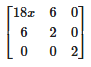

Используем Критерий Сильвестра: 

для точки (0, 0, 1) Матрица Гессе
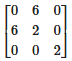

M1 = 0

M2 = 0*2-6*6 = -36

Так как M2 <0 , точка (0, 0, 1)— седловая точка

для точки (2, -6, 1) Матрица Гессе
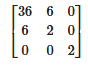

M1 = 36 > 0

M2 = 36*2 - 6*6 = 36 > 0

M3 = detH = 36*(2*2-0) -6*(6*2-0) + 0 = 144-72 = 72 > 0

Так как все главные миноры положительны, точка (2, -6, 1) — точка минимума

Задание 3
Найдите условный экстремум функции:
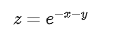
Если задано следующее условие:
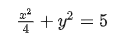

1.Oбъединяем функцию z и функцию ограничений x²/4 + y² = 5 в функцию Лагранжа, где λ - множитель Лагранжа

L(x,y,λ) = e^(-x-y) + 8y + λ(x²/4 + y² - 5)

2.Находим частные производные

dL/dx = -e^(-x-y) + λх/2

dL/dy = -e^(-x-y) + 2λy

dL/dλ = x²/4 + y² - 5

3.Приравниваем частные производные к 0

-e^(-x-y) + λх/2 = 0

-e^(-x-y) + 2λy = 0

x²/4 + y² - 5 = 0

4.Решаем систему уравнений. Выражаем λ из 1 и  2 уравнений и приравниваем

λ = 2e^(-x-y) / x 

λ = e^(-x-y) / 2y

2e^(-x-y) / x  = e^(-x-y) / 2y

2 / x = 1 / 2y
x = 4y

Подставляем значение х в уравнение ограничения:

16y² / 4 + y² = 5 -> 4y² + y² = 5 -> y² = 1

y = +-1

Находим соответствующие значения

Для y=1: x=4

Для y=-1: х-4

Т.о. условные экстремумы функции достигаются в точках (4, 1) и (-4, -1)

найдем значение функции в указанных точках

z(4, 1) = e^(-5)

z(-4, -1) = e^5

Ответ: минимум в точке (4,1) со значением e^(-5), максимум в точке (-4, -1) со значением e^5
.

Задание 4
Вам предоставлены данные о людях с наличием или отсутствием заболевания:

Скачать файл с данными

Признаки:
Age — возрастная группа.
Test — позитивный или негативный тест на заболевание.
Status — целевая переменная, есть инфекция или нет.
    
Реализовать алгоритм Наивного Байеса для решения задачи классификации, оценить качество полученного результата по итогу.

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
df_gezund = pd.read_csv("asset-v1_SkillFactory+MIFIML-1sem+2024+type@asset+block@sf_exam.csv")
display(df_gezund)

,Test,Age_Group,Status
0,Positive,Young,Infected
1,Positive,Young,Infected
2,Positive,Young,Infected
3,Positive,Old,Infected
4,Positive,Old,Infected
...,...,...,...
273,Positive,Old,Not_infected
274,Positive,Old,Not_infected
275,Positive,Old,Not_infected
276,Positive,Old,Not_infected


In [9]:
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()

# преобразуем категориальные признаки в числовые
df_gezund["Age_Group"] = label_encoder.fit_transform(df_gezund["Age_Group"])
df_gezund["Test"] = label_encoder.fit_transform(df_gezund["Test"])
df_gezund["Status"] = label_encoder.fit_transform(df_gezund["Status"])
display(df_gezund)


,Test,Age_Group,Status
0,1,1,0
1,1,1,0
2,1,1,0
3,1,0,0
4,1,0,0
...,...,...,...
273,1,0,1
274,1,0,1
275,1,0,1
276,1,0,1


In [10]:
X = df_gezund[["Age_Group", "Test"]]       # признаки 
y = df_gezund["Status"]                    # целевая переменная
# разделим данные на обучающую и тестовую выборки (75% - обучение, 25% - тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# обучение модели наивного Байеса
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = nb_classifier.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {round(accuracy,2)}')
print('Матрица ошибок:\n', conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.64
Матрица ошибок:
 [[15 23]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.39      0.55        38
           1       0.57      0.94      0.71        32

    accuracy                           0.64        70
   macro avg       0.72      0.67      0.63        70
weighted avg       0.74      0.64      0.62        70



Задание 5
Дана функция:
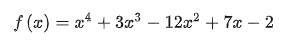

Оптимизируйте её с помощью метода Ньютона, используя язык программирования Python.

За начальную точку возьмите х = 10, необходимую точность 0.0001.

In [12]:
import sympy as sp

# Определение символов и функции
x = sp.symbols('x')
f = x**4 + 3 * x**3 - 12 * x**2 + 7 * x - 2

def newton_method(f, x0, tolerance):
    x_n = x0                                                  
    
    f_prime_x = sp.diff(f, x)                                 # считаем первую производную
    f_prime_func = sp.lambdify(x, f_prime_x, "numpy")         # преобразуем выражение в функцию, позволяющую выполнять числовые вычисления.
    f_double_x = sp.diff(f_prime_x, x)                        # считаем вторую производную
    f_double_prime_func = sp.lambdify(x, f_double_x, "numpy") # преобразуем выражение в функцию
    
    while True:
        # Проверяем вторую производную
        if f_double_prime_func(x_n) == 0:
            print("Вторая производная равна нулю. Метод Ньютона не может быть применен.")
            return None
        
        # Обновляем значение x_n
        x_n1 = x_n - f_prime_func(x_n) / f_double_prime_func(x_n)
        
        # Проверяем достижение точности
        if abs(x_n1 - x_n) < tolerance:
            break
        x_n = x_n1

    return x_n

# Вызов функции
result = newton_method(f=f, x0=10, tolerance=0.0001)
print(f"Найденный корень: {result}")

Найденный корень: 1.3101483441845974


Задание 6
Дано распределение случайной величины, которая отражает вероятность получения разного количества спам-писем в течение дня:
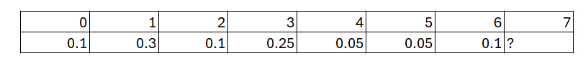

Найдите вероятность получения 7 спам-писем.

Найдите математическое ожидание для количества полученных писем.

Найдите дисперсию для количества полученных писем. Ответ округлите до сотых.


In [14]:
import numpy as np

# Сумма всех вероятностей = 1
# Р(х0) + Р(х1) + Р(х2) + Р(х3) + Р(х4) + Р(х5) + Р(х6) + Р(х7) = 1
# Р(х7) = 1 - (0,1 + 0,3 + 0,1 + 0,25 + 0,05 + 0,05 + 0,1) = 1 - 0,95 = 0,05
# Вероятность получения 7 спам-писем = 0,05

# количество спам писем
spam_count = np.array([0, 1, 2, 3, 4, 5, 6, 7])
probabilitet = np.array([0.1, 0.3, 0.1, 0.25, 0.05, 0.05, 0.1, None])
# Находим вероятность для получения 7 спам-писем
P7 = 1 - np.sum(probabilitet[:-1])
print('Вероятность получения 7 спам-писем = ',round(P7,2))
probabilitet[7] = P7

# mатематическое ожидание = сумма произведений значений на соответствующие вероятности
# М = х0*Р(х0) + х1*Р(х1) + х2*Р(х2) + х3*Р(х3) +х4*Р(х4) + х5*Р(х5) + х6*Р(х6) + х7*Р(х7)
M = np.sum(spam_count * probabilitet)
print('математическое ожидание = ', round(M,2))

# дисперсия = среднее квадратичное отклонение от среднего значения:
# математическое ожидание квадрата случайной величины
# M2 = х0**2*Р(х0) + х1**2*Р(х1) + х2**2*Р(х2) + х3**2*Р(х3) +х4**2*Р(х4) + х5**2*Р(х5) + х6**2*Р(х6) + х7**2*Р(х7)
M2 = np.sum((spam_count**2) * probabilitet) 
#D = M2 - M**2
D = M2 - M**2 
print('дисперсия = ', round(D,2))

Вероятность получения 7 спам-писем =  0.05
математическое ожидание =  2.65
дисперсия =  4.03


Задание 7
За 8 часов рабочего дня в колл-центр поступает в среднем 16 звонков. 
Найдите вероятность, что за час в колл-центр поступит не более 4 и не менее 2 звонков. 
Ответ округлите до тысячных. Задание должно быть решено без использования готовых функций Python.

Распределение Пуассона: вероятность появления фиксированного числа событий за определенный промежуток времени при известной средней частоте.
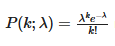

k — количество событий

λ - среднее число событий



In [17]:
import math

# вычисление факториала
def factorial(n):
    if n == 0 or n == 1:
        return 1
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result
#среднее число событий за час
l1 = 2
# вычислим вероятность для к=2,3 и 4, просуммируем и найдем искомую вероятность
P = [ (l1 **k * math.exp(-l1)) / factorial(k)  for k in range(2 ,5)]
print('вероятность 2 , 3 и 4 звонков\n',P)
print('вероятность, что за час в колл-центр поступит не более 4 и не менее 2 звонков =', round(sum(P),2))

вероятность 2 , 3 и 4 звонков
 [0.2706705664732254, 0.1804470443154836, 0.0902235221577418]
вероятность, что за час в колл-центр поступит не более 4 и не менее 2 звонков = 0.54
